<a href="https://colab.research.google.com/github/gargidutta0602/Deep-Learning-Playlist/blob/main/MNIST__Deep_Learning_basic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam,RMSprop
from tensorflow.keras.utils import to_categorical


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(2)

In [4]:
from tensorflow.keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train[0:11]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3], dtype=uint8)

In [7]:
y_train.dtype

dtype('uint8')

In [8]:
import pandas as pd

In [9]:
num_class = pd.Series(y_train).nunique()
num_class

10

In [10]:
x_train = x_train.reshape(x_train.shape[0],28*28)
x_train.shape

(60000, 784)

In [11]:
x_test = x_test.reshape(x_test.shape[0],28*28)
x_test.shape

(10000, 784)

In [12]:
#y_train= to_categorical(y_train,num_class)
#y_test =to_categorical(y_test,num_class)

In [13]:
y_train, y_test = to_categorical(y_train,num_class),to_categorical(y_test,num_class)


In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [25]:
model = Sequential()
model.add(Dense(100,input_dim = 784, activation = 'tanh'))
model.add(Dense(50, activation ='tanh'))
model.add(Dense(25, activation = 'tanh'))
model.add(Dense(10, activation = 'softmax'))
sgd = SGD(learning_rate = 0.001)
model.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 128, epochs = 25, validation_split = 0.2)

Epoch 1/25
375/375 [==============================] - 2s 4ms/step - loss: 2.0192 - accuracy: 0.3058 - val_loss: 1.6694 - val_accuracy: 0.5015
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 1.5046 - accuracy: 0.5904 - val_loss: 1.3407 - val_accuracy: 0.6621
Epoch 3/25
375/375 [==============================] - 1s 2ms/step - loss: 1.2591 - accuracy: 0.6858 - val_loss: 1.1543 - val_accuracy: 0.7249
Epoch 4/25
375/375 [==============================] - 1s 2ms/step - loss: 1.1053 - accuracy: 0.7355 - val_loss: 1.0248 - val_accuracy: 0.7663
Epoch 5/25
375/375 [==============================] - 1s 2ms/step - loss: 0.9950 - accuracy: 0.7681 - val_loss: 0.9310 - val_accuracy: 0.7928
Epoch 6/25
375/375 [==============================] - 1s 2ms/step - loss: 0.9111 - accuracy: 0.7901 - val_loss: 0.8559 - val_accuracy: 0.8091
Epoch 7/25
375/375 [==============================] - 1s 2ms/step - loss: 0.8436 - accuracy: 0.8052 - val_loss: 0.7954 - val_accuracy: 0.8242
Epoch 

In [38]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    # summarize history for accuracy
    axs[0].plot(model_history.history["accuracy"], label = "train")
    axs[0].plot(model_history.history['val_accuracy'], label = "test")
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend()
    # summarize history for loss
    axs[1].plot(model_history.history['loss'], label = 'train')
    axs[1].plot(model_history.history['val_loss'], label = 'test')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend()
    plt.show()

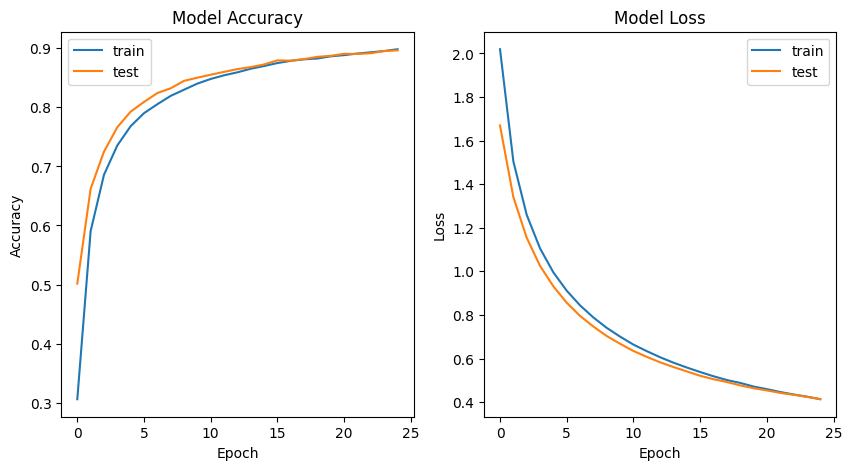

In [39]:
plot_model_history(history)

Low learning rate and momentum

Epoch 1/25
375/375 [==============================] - 2s 4ms/step - loss: 1.6419 - accuracy: 0.4896 - val_loss: 1.1225 - val_accuracy: 0.7280
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 0.9373 - accuracy: 0.7699 - val_loss: 0.7593 - val_accuracy: 0.8175
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.6842 - accuracy: 0.8318 - val_loss: 0.5904 - val_accuracy: 0.8528
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.5502 - accuracy: 0.8608 - val_loss: 0.4907 - val_accuracy: 0.8768
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.4631 - accuracy: 0.8795 - val_loss: 0.4275 - val_accuracy: 0.8898
Epoch 6/25
375/375 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.8906 - val_loss: 0.3867 - val_accuracy: 0.8965
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.3677 - accuracy: 0.8996 - val_loss: 0.3557 - val_accuracy: 0.9025
Epoch 

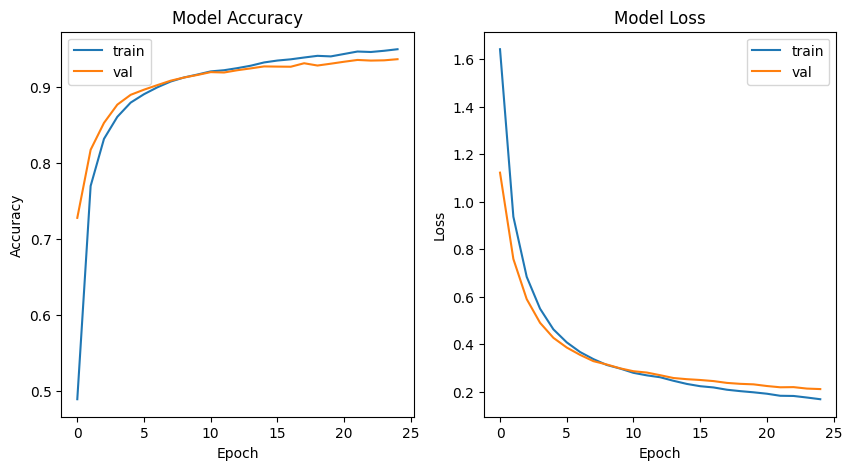

In [59]:
model = Sequential()
model.add(Dense(100,input_dim = 784, activation = 'tanh'))
model.add(Dense(50, activation ='tanh'))
model.add(Dense(25, activation = 'tanh'))
model.add(Dense(10, activation = 'softmax'))
sgd = Adam(learning_rate = 0.0001)
model.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 128, epochs = 25, validation_split = 0.2)
plot_model_history(history)

In [60]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [72]:
y_pred = np.argmax(y_pred, axis = 1)

In [78]:
y_pred[314]

1

In [67]:
y_test.shape

(10000, 10)

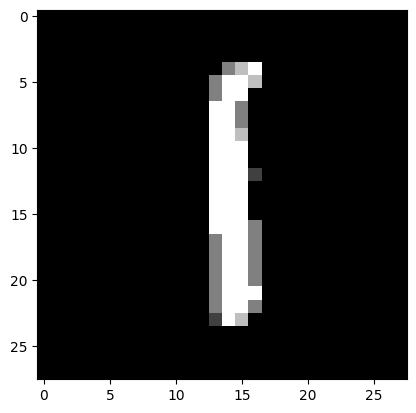

In [79]:
plt.imshow(x_test[314].reshape(28,28),cmap = 'gray')

Introducing callbacks

In [80]:
my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
]

Epoch 1/25
375/375 [==============================] - 2s 3ms/step - loss: 1.7350 - accuracy: 0.4703 - val_loss: 1.1980 - val_accuracy: 0.7197
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 1.0083 - accuracy: 0.7568 - val_loss: 0.8063 - val_accuracy: 0.8123
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.7333 - accuracy: 0.8207 - val_loss: 0.6229 - val_accuracy: 0.8477
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.5858 - accuracy: 0.8505 - val_loss: 0.5147 - val_accuracy: 0.8675
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.4954 - accuracy: 0.8702 - val_loss: 0.4470 - val_accuracy: 0.8824
Epoch 6/25
375/375 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.8832 - val_loss: 0.4060 - val_accuracy: 0.8897
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.3927 - accuracy: 0.8928 - val_loss: 0.3719 - val_accuracy: 0.8963
Epoch 

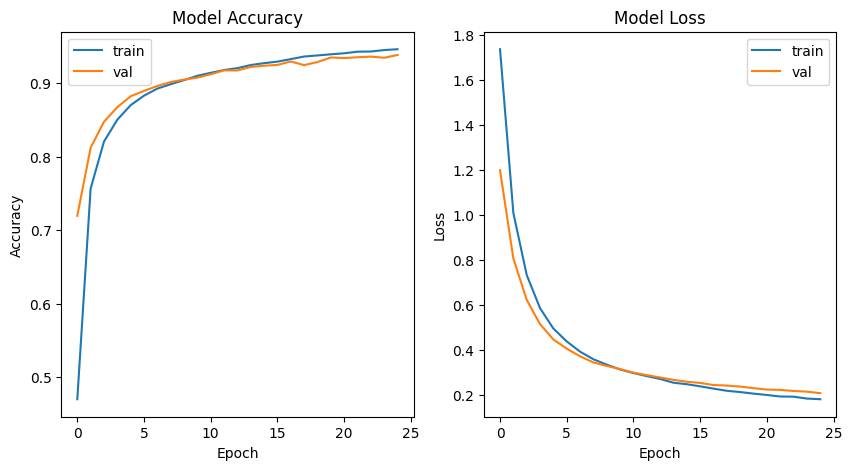

In [82]:
model = Sequential()
model.add(Dense(100,input_dim = 784, activation = 'tanh'))
model.add(Dense(50, activation ='tanh'))
model.add(Dense(25, activation = 'tanh'))
model.add(Dense(10, activation = 'softmax'))
sgd = Adam(learning_rate = 0.0001)
model.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 128, epochs = 25, validation_split = 0.2, callbacks = my_callbacks)
plot_model_history(history)